In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import scipy.stats as stats
from sklearn import preprocessing

%matplotlib inline

In [6]:
#establish groups, below and above median for income
us_median = 59_039

#import dataframe
eda_df = pd.read_csv('../data/eda_data.csv')

In [7]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017131 entries, 0 to 1017130
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Unnamed: 0      1017131 non-null  int64  
 1   STATE_x         1017131 non-null  object 
 2   zipcode         1017131 non-null  int64  
 3   N1              1017131 non-null  float64
 4   N02650          1017131 non-null  float64
 5   A02650          1017131 non-null  float64
 6   avg_income      1017131 non-null  float64
 7   NAME            1017131 non-null  object 
 8   CITY            1017131 non-null  object 
 9   STATE_y         1017131 non-null  object 
 10  ZIP             1017131 non-null  object 
 11  SUBSECTION      1017131 non-null  int64  
 12  CLASSIFICATION  1017131 non-null  int64  
 13  FOUNDATION      1017131 non-null  int64  
 14  ASSET_AMT       1017131 non-null  float64
 15  INCOME_AMT      1017131 non-null  float64
 16  REVENUE_AMT     1017131 non-null  fl

## NP plots

In [57]:
#establish df for plotting num of NPs per State > city > zip
#plot on folium density map
#number of NPs registered with IRS by state


#count per state
nps_per_state = eda_df.groupby(['STATE_x']).count()

state_value = nps_per_state['zipcode'].sort_values(ascending=False)
state_index = state_value.index


#sum of revenues per state (negative revs included)
np_rev_per_state = eda_df.groupby(['STATE_x']).sum()

rev_value = np_rev_per_state['REVENUE_AMT'].sort_values(ascending=False)
rev_index = rev_value.index

#dual axis bar plot (reformat values to show in millions)

In [58]:
#establish df for plotting num of NPs per State > city > zip
#plot on folium density map
#number of NPs registered with IRS by city

#count per city
nps_per_city = eda_df.groupby(['CITY']).count()

city_value = nps_per_city['zipcode'].sort_values(ascending=False)
city_index = city_value.index

#sum of revenues per city (negative revs included)
np_rev_per_city = eda_df.groupby(['CITY']).sum()

cityrev_value = np_rev_per_city['REVENUE_AMT'].sort_values(ascending=False)
cityrev_index = cityrev_value.index


In [53]:
#nps by subsection, relevant because this will tell me 
#type of organization and if contributions are deductible
#deductible is not beind analyzed at this moment

#which subsection have the most NPs and where are they in the US

#count per state
npsubsec_per_state = eda_df.groupby(['STATE_x','SUBSECTION']).count()

statesub_value = npsubsec_per_state['zipcode'].sort_values(ascending=False)
statesub_index = statesub_value.index

#sum of revenues per state (negative revs included)
npsubsecrev_per_state = eda_df.groupby(['STATE_x','SUBSECTION']).sum()

statesubrev_value = npsubsecrev_per_state['REVENUE_AMT'].sort_values(ascending=False)
statesubrev_index = statesubrev_value.index

In [66]:
#nps by foundation, where they receive most of their funding

#which foundations have the most NPs and where are they in the US

#count per state
npsubfou_per_state = eda_df.groupby(['STATE_x','SUBSECTION', 'FOUNDATION']).count()

statefou_value = npsubfou_per_state['zipcode'].sort_values(ascending=False)
statefou_index = statefou_value.index

#sum of revenues per state (negative revs included)
npsubfourev_per_state = eda_df.groupby(['STATE_x','SUBSECTION', 'FOUNDATION']).sum()

statesubrev_value = npsubfourev_per_state['REVENUE_AMT'].sort_values(ascending=False)
statesubrev_index = statesubrev_value.index


In [67]:
#nps by foundation, where they receive most of their funding

#which foundations have the most NPs and where are they in the US

#count per state
npfou2_per_state = eda_df.groupby(['FOUNDATION','STATE_x']).count()

statefou2_value = npfou2_per_state['zipcode'].sort_values(ascending=False)
statefou2_index = statefou2_value.index

#sum of revenues per state (negative revs included)
npfourev_per_state = eda_df.groupby(['FOUNDATION','STATE_x']).sum()

statefourev_value = npfourev_per_state['REVENUE_AMT'].sort_values(ascending=False)
statefourev_index = statefourev_value.index

In [85]:
#nps by foundation, where they receive most of their funding

#which foundations have the most NPs and where are they in the US

#count per foundation
npfou = eda_df.groupby(['FOUNDATION']).count()

fou_value = npfou['zipcode'].sort_values(ascending=False)
fou_index = fou_value.index

#sum of revenues per foundation (negative revs included)
npfourev = eda_df.groupby(['FOUNDATION']).sum()

fourev_value = npfourev['REVENUE_AMT'].sort_values(ascending=False)
fourev_index = fourev_value.index

In [80]:
#nps by foundation, where they receive most of their funding

#which foundations have the most NPs and where are they in the US

#count foundations per city
npfou2_per_city = eda_df.groupby(['FOUNDATION','CITY']).count()

cityfou2_value = npfou2_per_city['zipcode'].sort_values(ascending=False)
cityfou2_index = cityfou2_value.index

#sum of foundation revenues per city (negative revs included)
npfourev_per_city = eda_df.groupby(['FOUNDATION','CITY']).sum()

cityfourev_value = npfourev_per_city['REVENUE_AMT'].sort_values(ascending=False)
cityfourev_index = cityfourev_value.index

## Income Plots

In [ ]:
#hist of income her state and/or zip

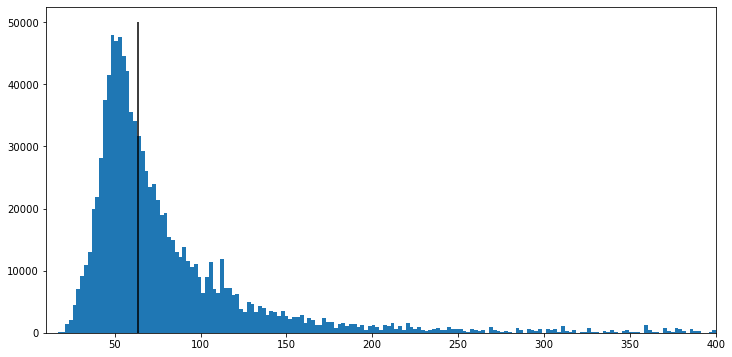

In [101]:
x = eda_df['avg_income']


plt.figure(figsize=(12,6))
plt.xlim(10, 400)
plt.vlines(x.median(),0,50000)
plt.hist(x, bins=1000)
plt.show()

#pareto distribution which is very typical for income 80% pop only has 20% of wealth/income

In [100]:
#box blot of 

63.77778210116732

## NP vs. Income Plots

In [ ]:
#scatter plot by foundation vs avg income...



In [ ]:
#density of nps
#density of income


## stats analysis

In [138]:
eda_df[eda_df['zipcode']==72404]

,Unnamed: 0,STATE_x,zipcode,N1,N02650,A02650,avg_income,NAME,CITY,STATE_y,ZIP,SUBSECTION,CLASSIFICATION,FOUNDATION,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD
20961,20961,AR,72404,11760.0,11760.0,891315.0,75.792092,DOWN SYNDROME ASSOCIATION OF NORTHEAST ARKANSA...,JONESBORO,AR,72404-8553,3,1200,15,0.0,0.0,0.0,G25
20962,20962,AR,72404,11760.0,11760.0,891315.0,75.792092,KINGS RANCH INC,JONESBORO,AR,72404-1007,3,1000,15,896847.0,643677.0,-251113.0,P73
20963,20963,AR,72404,11760.0,11760.0,891315.0,75.792092,ALPHA GAMMA RHO FRATERNITY,JONESBORO,AR,72404-7680,7,1000,0,515283.0,129355.0,109229.0,NaN
20964,20964,AR,72404,11760.0,11760.0,891315.0,75.792092,ARKANSAS MASTER NATURALISTS INC,JONESBORO,AR,72404-9397,3,1000,16,0.0,0.0,0.0,C34
20965,20965,AR,72404,11760.0,11760.0,891315.0,75.792092,PI BETA PHI FRATERNITY,JONESBORO,AR,72404-8594,7,1000,0,0.0,0.0,0.0,NaN
20966,20966,AR,72404,11760.0,11760.0,891315.0,75.792092,SHOW OF WONDERS,JONESBORO,AR,72404-8206,3,1000,15,0.0,0.0,0.0,A65
20967,20967,AR,72404,11760.0,11760.0,891315.0,75.792092,JONESBORO SHOOTING STARS TRAP TEAM,JONESBORO,AR,72404-7839,3,1000,15,0.0,0.0,0.0,N60
20968,20968,AR,72404,11760.0,11760.0,891315.0,75.792092,ROBINSON TRAINING & WORKFORCE READINESS INSTITUTE,JONESBORO,AR,72404-9300,3,1200,15,0.0,0.0,0.0,J20
20969,20969,AR,72404,11760.0,11760.0,891315.0,75.792092,NATIONAL FEDERATION OF MUSIC CLUBS,JONESBORO,AR,72404-8045,3,2000,16,0.0,0.0,0.0,A68
20970,20970,AR,72404,11760.0,11760.0,891315.0,75.792092,GAMMA ETA ALUMNI ASSOCIATION,JONESBORO,AR,72404-8754,3,1000,16,0.0,0.0,0.0,B84


In [104]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017131 entries, 0 to 1017130
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Unnamed: 0      1017131 non-null  int64  
 1   STATE_x         1017131 non-null  object 
 2   zipcode         1017131 non-null  int64  
 3   N1              1017131 non-null  float64
 4   N02650          1017131 non-null  float64
 5   A02650          1017131 non-null  float64
 6   avg_income      1017131 non-null  float64
 7   NAME            1017131 non-null  object 
 8   CITY            1017131 non-null  object 
 9   STATE_y         1017131 non-null  object 
 10  ZIP             1017131 non-null  object 
 11  SUBSECTION      1017131 non-null  int64  
 12  CLASSIFICATION  1017131 non-null  int64  
 13  FOUNDATION      1017131 non-null  int64  
 14  ASSET_AMT       1017131 non-null  float64
 15  INCOME_AMT      1017131 non-null  float64
 16  REVENUE_AMT     1017131 non-null  fl

In [136]:
a = eda_df[eda_df['avg_income'] < eda_df['avg_income'].median()]['REVENUE_AMT'].values
b = eda_df[eda_df['avg_income'] >= eda_df['avg_income'].median()]['REVENUE_AMT'].values

ttest, pvalue = stats.ttest_ind(a,b)

pvalue

1.308095060462163e-11

In [139]:
stat_df = eda_df[['avg_income', 'REVENUE_AMT']]

In [142]:
clean_teststat_df[stat_df['REVENUE_AMT']>0]

,avg_income,REVENUE_AMT
0,75.148579,154543.0
1,75.148579,6823299.0
3,75.148579,883302.0
5,75.148579,3000.0
6,75.148579,1022511.0
...,...,...
1017117,84.120000,64671.0
1017120,84.120000,60188.0
1017122,84.120000,297669.0
1017125,94.558947,98023.0


In [ ]:
a = eda_df[eda_df['avg_income'] < eda_df['avg_income'].median()]['REVENUE_AMT'].values
b = eda_df[eda_df['avg_income'] >= eda_df['avg_income'].median()]['REVENUE_AMT'].values

ttest, pvalue = stats.ttest_ind(a,b)

pvalue